In [727]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights
import torch.optim as optim 
from PIL import Image
from torch.utils.data import Dataset
import os
from torchvision import tv_tensors
import random
from torchvision.transforms import ColorJitter
from torchvision.transforms import functional as F
import cv2
from torch.utils.data import random_split
import tensorflow as tf
import numpy as np
import copy

import matplotlib.pyplot as plt

In [728]:
# Load a pre-trained Faster R-CNN model and modify it
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)


in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 2)
model.to('cpu')





FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [729]:
file_path='D:\Tempo_Run2024\TempoRun2024_Model(trial_1).pth'

model.load_state_dict(torch.load(file_path))
model.to('cpu')

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Dell\AppData\Local\Temp\ipykernel_3912\2341840480.py:1: SyntaxWarning: invalid escape sequence '\T'
  file_path='D:\Tempo_Run2024\TempoRun2024_Model(trial_1).pth'


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [730]:
img_path='latest_private/test_242.png'
model.eval()

image= Image.open(img_path).convert("RGB")
width,height=image.size[0],image.size[1]
transform= ToTensor()
image= transform(image).unsqueeze_(0)
output=model(image)[0]

In [731]:
boxes=output['boxes']

In [732]:
img_path='latest_private/test_242.png'
image= Image.open(img_path).convert("RGB")
transform= ToTensor()
image= transform(image)

In [733]:
def show(img,boxes,ax,color=(255,0,0)):
    print(img.shape)
    boxes=boxes.detach().cpu().numpy().astype(np.int32)
    sample=img.permute(1,2,0).numpy().copy()
    for box in boxes:
        sample = cv2.rectangle(sample,(box[0], box[1]),(box[2], box[3]),color, 3)
    
    ax.axis("off");
    ax.imshow(sample);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[1023.3818,  330.2202, 1492.2610,  443.0131],
        [ 655.0822,  190.6627,  751.0640,  407.3767],
        [  38.9544,  368.1655,  513.8130,  483.3898],
        [ 566.9486,  768.2867, 1487.8190,  898.0533]],
       grad_fn=<IndexBackward0>)
torch.Size([3, 1080, 1920])


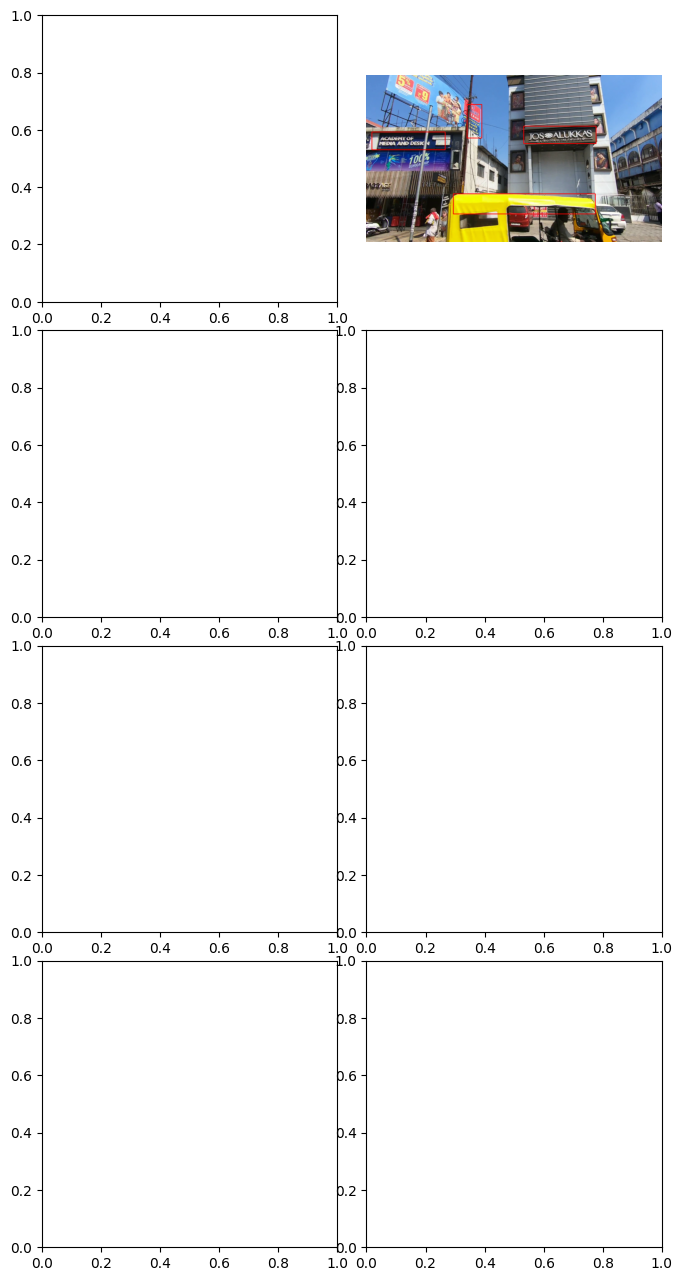

In [736]:
"""During inference, the model requires only the input tensors, and returns the 
   post-processed predictions as a List[Dict[Tensor]], one for each input image. The fields
   of the Dict are as follows:
   - boxes (FloatTensor[N, 4]): the predicted boxes in [x0, y0, x1, y1] format
   - labels (Int64Tensor[N]): the predicted labels for each image
   - scores (Tensor[N]): the scores or each prediction"""
import matplotlib.pyplot as plt
fig,axes=plt.subplots(4,2,figsize=(8,16))
plt.subplots_adjust(wspace=0.1,hspace=0.1)
        #real bounding boxes
    
    #non-max suppression
    
    #threshold=0.5
    #iou_threshold=0.8
    
pp_boxes=output["boxes"][output["scores"]>=0.3]
scores=output["scores"][output["scores"]>=0.3]
nms=torchvision.ops.nms(pp_boxes,scores,iou_threshold=0.05)
pp_boxes=pp_boxes[nms]
print(pp_boxes)
# 0.3
# 0.3
#  0.15  
show(image,pp_boxes,axes[0,1]);
    

In [735]:
abc

NameError: name 'abc' is not defined

In [ ]:
import random
from pathlib import Path
from PIL import Image, ImageDraw

path_data = Path("latest_private")
list_imgs_path = list(path_data.iterdir())

# Chọn ngẫu nhiên 3 ảnh để vẽ bounding box từ Ban tổ chức cung cấp
for img_path in list_imgs_path:
    img = Image.open(img_path)
    width, height = img.size
    img.resize((200, 400), Image.Resampling.LANCZOS)
    print(img_path)
    label_path = img_path.parent.parent / 'labels' / (img_path.stem + '.txt')

    bounding_boxs = open(label_path, "r").readlines()
    for bbox in bounding_boxs:
        x, y, w, h = map(float, bbox.split()[1:])

        x_min = x - w / 2
        y_min = y - h / 2
        x_max = x + w / 2
        y_max = y + h / 2

        print(x_min, y_min, x_max, y_max)

        img1 = ImageDraw.Draw(img)
        img1.rectangle([(int(x_min * width), int(y_min * height)), (int(x_max * width), int(y_max * height))], outline="red")

    display(img)


latest_private\image_501.jpg


ValueError: too many values to unpack (expected 4)